In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
!pip install tensorflow

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
awscli 1.18.211 requires docutils<0.16,>=0.10, but you have docutils 0.17.1 which is incompatible.
aws-shell 0.2.2 requires prompt-toolkit<1.1.0,>=1.0.0, but you have prompt-toolkit 3.0.20 which is in

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./weight-height.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
X = df.Height.values # Tensor 1D
X

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [16]:
X = df[['Height']].values # Tensor 2D
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [17]:
y_true = df[['Weight']].values
y_true

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [18]:
print(X.shape)
print(y_true.shape)

(10000, 1)
(10000, 1)


# Now Create our Deep learning Model

In [20]:
np.array([73.84701702]).shape

(1,)

In [21]:
model = Sequential()
#               Dense(outputNode num, input_shape=(1,)  )
model.add(Dense(1, input_shape=(1,)))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(Adam(lr=0.8), 'mean_squared_error')
# optimizer
# error function

### Now Start Training

In [27]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 659us/step - loss: 1757.5385
Epoch 2/40
313/313 [==============================] - 0s 697us/step - loss: 553.6646
Epoch 3/40
313/313 [==============================] - 0s 694us/step - loss: 521.3347
Epoch 4/40
313/313 [==============================] - 0s 669us/step - loss: 479.6862
Epoch 5/40
313/313 [==============================] - 0s 688us/step - loss: 429.4184
Epoch 6/40
313/313 [==============================] - 0s 712us/step - loss: 396.1997
Epoch 7/40
313/313 [==============================] - 0s 636us/step - loss: 349.1466
Epoch 8/40
313/313 [==============================] - 0s 776us/step - loss: 343.0125
Epoch 9/40
313/313 [==============================] - 0s 695us/step - loss: 290.9714
Epoch 10/40
313/313 [==============================] - 0s 726us/step - loss: 291.8253
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 255.9801
Epoch 12/40
313/313 [==============================] - 0s 1ms/st

In [28]:
y_pred = model.predict(X)
y_pred

array([[227.09598],
       [187.60068],
       [229.14743],
       ...,
       [149.28433],
       [189.56827],
       [134.28384]], dtype=float32)

In [29]:
y_true

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

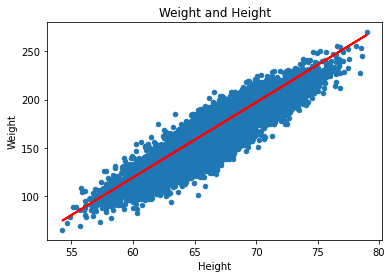

In [32]:
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Weight and Height")

plt.plot(X,y_pred, color='red', linewidth=2)

In [33]:
w, b = model.get_weights()# train able perameters


In [34]:
w

array([[7.797523]], dtype=float32)

In [35]:
b

array([-348.7278], dtype=float32)

In [36]:
model.predict([[120]])

array([[586.975]], dtype=float32)

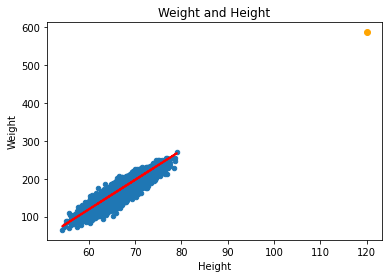

In [37]:
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Weight and Height")

plt.plot(X,y_pred, color='red', linewidth=2)
plt.scatter(x=run_height,
            y=[586.975],
            color='orange')

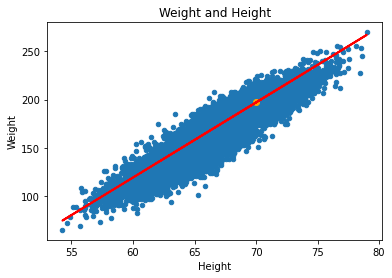

In [41]:
run_height = [70]
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Weight and Height")

plt.plot(X,y_pred, color='red', linewidth=2)
plt.scatter(x=run_height,
            y=model.predict([run_height]),
            color='orange')

# Attendacnce

In [ ]:
import re

x = """
You4:20 PM
https://www.youtube.com/channel/UCml65rMhaWnwyg4dW2m5hEg/videos
syed daniyal4:27 PM
4250189782769
TARIQ JAMIL4:30 PM
4250182298545
MUSTAFA NADIMI4:31 PM
5440053241639
Nadir Ali4:31 PM
4130311530273
Farrukh Jalil4:32 PM
42101-1397876-3
Syed Mohammad Asad Asad4:33 PM
4240180561365
Madiha Obaid Obaid4:35 PM
4220105920780
Syed Umair Ahmed4:35 PM
4130485196673
Muneeb Abdul Rauf4:36 PM
4230181544787
Imran Ali4:36 PM
4210176950677
Syed Sajjad Ali Shah4:36 PM
1510120026221
Zoya Ansari4:37 PM
4220186465696
Muhammad Fahad4:37 PM
4210117498405 (Muhammad Fahd)
Syed Zaim Nazir4:37 PM
4220171026219
Abdullah Mukhtar4:43 PM
42101-7575818-9
Rizwan Ali4:45 PM
4230174256393
Bilal Uddin5:36 PM
4220122191357
Farrukh Jalil5:45 PM
4210113978763
Amna Shahid6:13 PM
3460348242756
Atif Ismail6:14 PM
4220102620907
Atif Ismail
Kenneth Fahad6:14 PM
3310541597331
mcc-qjtf-rix
""".replace("-","")


cnic = pd.DataFrame(list(set(re.findall("\d{13}",x))), columns=["CNIC"])
print